In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import time
import random
np.random.seed(42)
random.seed(42)

In [ ]:
class Maze:
  def __init__(self, maze, start_position, goal_position):
    self.maze = maze
    self.maze_height = maze_layout.shape[0]
    self.maze_width = maze_layout.shape[1]
    self.start_position = start_position
    self.goal_position = goal_position

  def show_maze(self):

    plt.imshow(self.maze, cmap='gray')
    plt.text(self.start_position[0], self.start_position[1], 's', ha='center', va='center', color='red', fontsize=20)
    plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    plt.xticks([]), plt.yticks([])
    plt.show()

print("This code block has been run and the Maze class is now available for use.")

This code block has been run and the Maze class is now available for use.


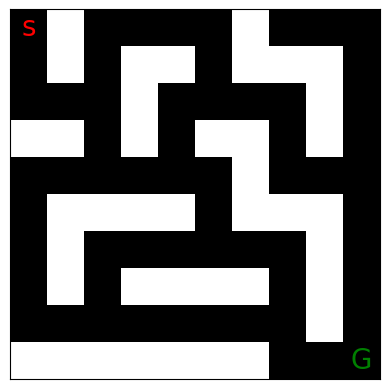

In [ ]:

maze_layout = np.array([
    [0,1,0,0,0,0,1,0,0,0],
    [0,1,0,1,1,0,1,1,1,0],
    [0,0,0,1,0,0,0,0,1,0],
    [1,1,0,1,0,1,1,0,1,0],
    [0,0,0,0,0,0,1,0,0,0],
    [0,1,1,1,1,0,1,1,1,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,1,0,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,0,1,0],
    [1,1,1,1,1,1,1,0,0,0]
])

maze = Maze(maze_layout, (0,0), (9,9))
maze.show_maze()

In [ ]:


actions = [(-1, 0),
           (1,0),
           (0,-1),
           (0,1)]
class QLearningAgent:
  def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
    self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))
    self.learning_rate = learning_rate
    self.discount_factor = discount_factor
    self.exploration_start = exploration_start
    self.exploration_end = exploration_end
    self.num_episodes = num_episodes

  def get_exploration_rate(self, current_episode):
    return max(self.exploration_end,
               self.exploration_start * (0.9995 ** current_episode))

  def get_action(self, state, current_episode):
    exploration_rate = self.get_exploration_rate(current_episode)

    if np.random.rand() < exploration_rate:
      return np.random.randint(4)
    else:
      return np.argmax(self.q_table[state])

  def update_q_table(self,state,action,next_state, reward):
    best_next_action = np.argmax(self.q_table[next_state])
    current_q_value = self.q_table[state][action]
    new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action]-current_q_value)


In [ ]:


goal_reward = 50
wall_penalty = -5
step_penalty = -1

print("The reward system has been defined.")


The reward system has been defined.


In [ ]:


def finish_episode(agent, maze, current_episode, train=True, max_steps=200):
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    while not is_done and episode_step < max_steps:
        action = agent.get_action(current_state, current_episode)
        next_state = (current_state[0] + actions[action][0],
                      current_state[1] + actions[action][1])

        if (next_state[0] < 0 or next_state[0] >= maze.maze_height or
            next_state[1] < 0 or next_state[1] >= maze.maze_width or
            maze.maze[next_state[0]][next_state[1]] == 1):
            reward = wall_penalty
            next_state = current_state
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            is_done = True
        else:
            path.append(current_state)
            reward = step_penalty

        episode_reward += reward
        episode_step += 1

        if train:
            agent.update_q_table(current_state, action, next_state, reward)

        current_state = next_state

    return episode_reward, episode_step, path

print("This code block has been run and the finish_episode function is now available for use.")

This code block has been run and the finish_episode function is now available for use.


Training agent for 20000 episodes...
Episode 2000/20000 | Avg Reward (last 100): -852.56
Episode 4000/20000 | Avg Reward (last 100): -945.36
Episode 6000/20000 | Avg Reward (last 100): -977.56
Episode 8000/20000 | Avg Reward (last 100): -993.20
Episode 10000/20000 | Avg Reward (last 100): -996.64
Episode 12000/20000 | Avg Reward (last 100): -995.60
Episode 14000/20000 | Avg Reward (last 100): -995.04
Episode 16000/20000 | Avg Reward (last 100): -996.24
Episode 18000/20000 | Avg Reward (last 100): -996.56
Episode 20000/20000 | Avg Reward (last 100): -995.88


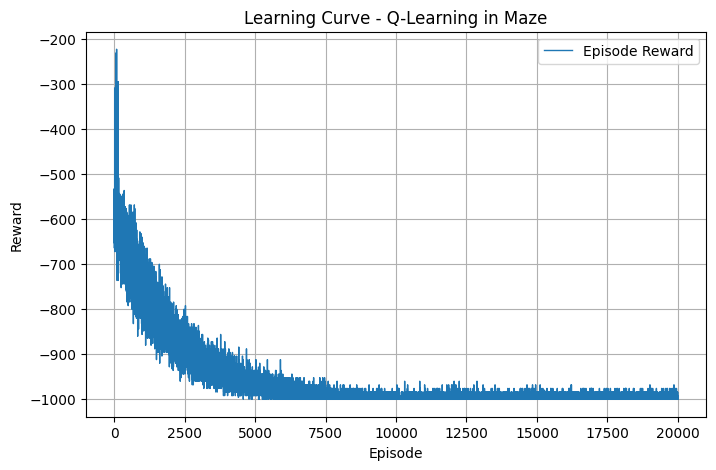

Training complete.


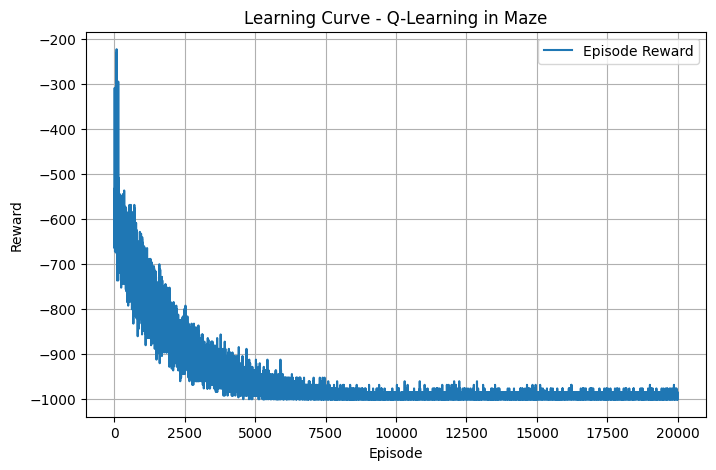

Learned Path:
(0, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (1, 2) -> (2, 2) -> (1, 2) -> (0, 2) -> (0, 3) -> (0, 4) -> (0, 3) -> (0, 4) -> (0, 5) -> (1, 5) -> (0, 5) -> (1, 5) -> (2, 5) -> (2, 4) -> (2, 5) -> (2, 6) -> (2, 5) -> (1, 5) -> (2, 5) -> (1, 5) -> (2, 5) -> (2, 4) -> (3, 4) -> (4, 4) -> (4, 5) -> (5, 5) -> (6, 5) -> (6, 4) -> (6, 3) -> (6, 4) -> (6, 5) -> (6, 6) -> (6, 7) -> (6, 6) -> (6, 5) -> (6, 6) -> (6, 5) -> (5, 5) -> (4, 5) -> (5, 5) -> (4, 5) -> (4, 4) -> (3, 4) -> (2, 4) -> (3, 4) -> (4, 4) -> (4, 3) -> (4, 4) -> (4, 5) -> (5, 5) -> (4, 5) -> (4, 4) -> (3, 4) -> (4, 4) -> (3, 4) -> (4, 4) -> (4, 5) -> (5, 5) -> (4, 5) -> (5, 5) -> (6, 5) -> (6, 6) -> (6, 7) -> (7, 7) -> (6, 7) -> (7, 7) -> (6, 7) -> (7, 7) -> (8, 7) -> (9, 7) -> (8, 7) -> (8, 6) -> (8, 7)

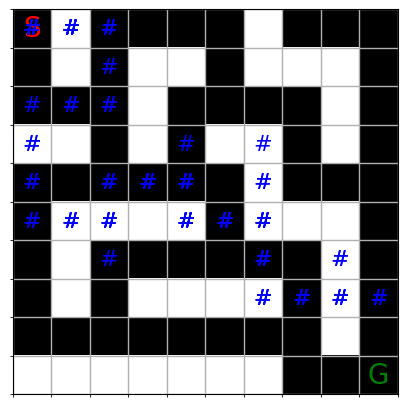

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
os.makedirs("results", exist_ok=True)

def test_agent(agent, maze, num_episodes=1):
    # Run a single evaluation episode (no training)
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the path
    print("Learned Path:")
    for x, y in path:
        print(f"({x}, {y}) -> ", end="")
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)


    if plt.get_fignums():
        plt.close('all')


    plt.figure(figsize=(5, 5))
    plt.imshow(maze.maze, cmap='gray')


    plt.text(maze.start_position[0], maze.start_position[1], 'S',
             ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G',
             ha='center', va='center', color='green', fontsize=20)

    # Draw path
    for x, y in path:
        plt.text(x, y, '#', ha='center', va='center', color='blue', fontsize=16)


    plt.xticks(np.arange(maze.maze_width))
    plt.yticks(np.arange(maze.maze_height))
    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, maze.maze_width, 1), minor=True)
    ax.set_yticks(np.arange(-.5, maze.maze_height, 1), minor=True)
    ax.grid(which='minor', linestyle='-', linewidth=1)
    plt.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)

    plt.show()

    return episode_step, episode_reward

def train_agent(agent, maze, num_episodes=None, plot=True, save_dir="results"):
    """
    Trains the given Q-learning agent on the provided maze environment.

    Parameters:
        agent (QLearningAgent): The Q-learning agent instance.
        maze (Maze): The maze environment.
        num_episodes (int): Number of training episodes (defaults to agent.num_episodes).
        plot (bool): Whether to plot the learning curve.
        save_dir (str): Directory to save training results.
    Returns:
        rewards (list): Episode rewards collected during training.
    """
    if num_episodes is None:
        num_episodes = agent.num_episodes

    rewards = []

    print(f"Training agent for {num_episodes} episodes...")

    for episode in range(num_episodes):
        episode_reward, _, _ = finish_episode(agent, maze, episode, train=True)
        rewards.append(episode_reward)

        # Optional progress print
        if (episode + 1) % (num_episodes // 10) == 0:
            avg_reward = np.mean(rewards[-100:])
            print(f"Episode {episode+1}/{num_episodes} | Avg Reward (last 100): {avg_reward:.2f}")

    # Plot learning curve
    if plot:
        os.makedirs(save_dir, exist_ok=True)
        plt.figure(figsize=(8, 5))
        plt.plot(rewards, label="Episode Reward", linewidth=1)
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title("Learning Curve - Q-Learning in Maze")
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(save_dir, "learning_curve.png"))
        plt.show()

    print("Training complete.")
    return rewards

agent = QLearningAgent(maze, num_episodes=20000)

rewards = train_agent(agent, maze)

# Plot learning curve
plt.figure(figsize=(8,5))
plt.plot(rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Learning Curve - Q-Learning in Maze")
plt.legend()
plt.grid(True)
plt.savefig("results/learning_curve.png")
plt.show()

# Test after training (final learned path)
steps, reward = test_agent(agent, maze)
plt.savefig("results/learned_path.png")


In [ ]:
def train_agent(agent, maze, num_episodes=None, plot=True, save_dir="results"):
    """
    Trains the given Q-learning agent on the provided maze environment.

    Parameters:
        agent (QLearningAgent): The Q-learning agent instance.
        maze (Maze): The maze environment.
        num_episodes (int): Number of training episodes (defaults to agent.num_episodes).
        plot (bool): Whether to plot the learning curve.
        save_dir (str): Directory to save training results.
    Returns:
        rewards (list): Episode rewards collected during training.
    """
    if num_episodes is None:
        num_episodes = agent.num_episodes

    rewards = []

    print(f"Training agent for {num_episodes} episodes...")

    for episode in range(num_episodes):
        episode_reward, _, _ = finish_episode(agent, maze, episode, train=True)
        rewards.append(episode_reward)

        # Optional progress print
        if (episode + 1) % (num_episodes // 10) == 0:
            avg_reward = np.mean(rewards[-100:])
            print(f"Episode {episode+1}/{num_episodes} | Avg Reward (last 100): {avg_reward:.2f}")

    # Plot learning curve
    if plot:
        os.makedirs(save_dir, exist_ok=True)
        plt.figure(figsize=(8, 5))
        plt.plot(rewards, label="Episode Reward", linewidth=1)
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title("Learning Curve - Q-Learning in Maze")
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(save_dir, "learning_curve.png"))
        plt.show()

    print("Training complete.")
    return rewards


Training agent for 20000 episodes...
Episode 2000/20000 | Avg Reward (last 100): -849.04
Episode 4000/20000 | Avg Reward (last 100): -946.80
Episode 6000/20000 | Avg Reward (last 100): -981.16
Episode 8000/20000 | Avg Reward (last 100): -991.04
Episode 10000/20000 | Avg Reward (last 100): -996.36
Episode 12000/20000 | Avg Reward (last 100): -996.00
Episode 14000/20000 | Avg Reward (last 100): -996.64
Episode 16000/20000 | Avg Reward (last 100): -996.00
Episode 18000/20000 | Avg Reward (last 100): -995.68
Episode 20000/20000 | Avg Reward (last 100): -996.32


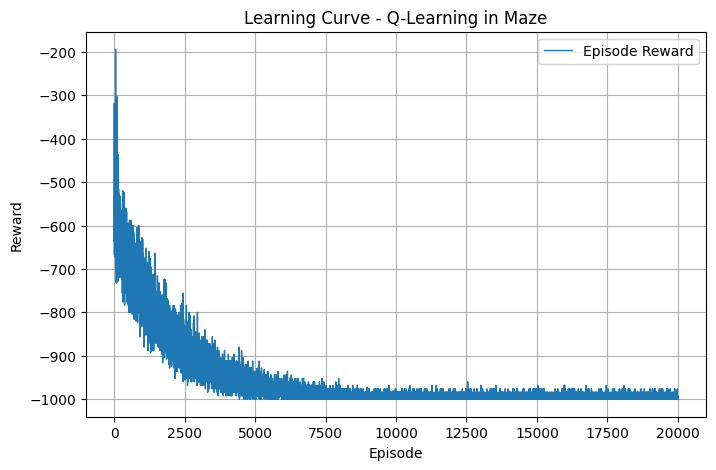

Training complete.
Learned Path:
(0, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (1, 0) -> (0, 0) -> (1, 0) -> (2, 0) -> (2, 1) -> (2, 2) -> (2, 1) -> (2, 0) -> (2, 1) -> (2, 2) -> (3, 2) -> (4, 2) -> (3, 2) -> (4, 2) -> (4, 1) -> (4, 2) -> (4, 3) -> (4, 4) -> (4, 5) -> (5, 5) -> (6, 5) -> (6, 6) -> (6, 5) -> (5, 5) -> (4, 5) -> (5, 5) -> (6, 5) -> (6, 6) -> (6, 5) -> (6, 6) -> (6, 7) -> (7, 7) -> (8, 7) -> (7, 7) -> (8, 7) -> (7, 7) -> (6, 7) -> (6, 6) -> (6, 5) -> (6, 4) -> (6, 3) -> (6, 4) -> (6, 5) -> (6, 4) -> (6, 3) -> (6, 4) -> (6, 5) -> (5, 5) -> (6, 5) -> (6, 6) -> (6, 5) -> (6, 4) -> (6, 5) -> (6, 6) -> (6, 7) -> (7, 7) -> (6, 7) -> (7, 7) -> (6, 7) -> (7, 7) -> (8, 7) -> (7, 7) -> (8, 7) -> (9, 7) -> (8, 7) -> (9, 7) -> (9, 8) -> Goal!
Number of steps: 185
Total reward: -538


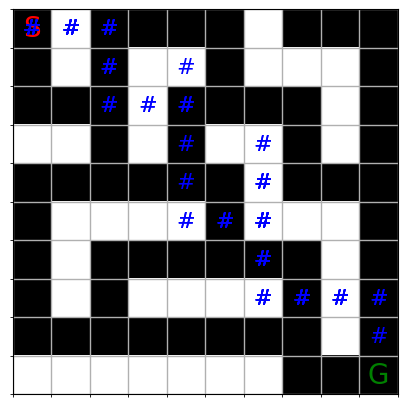

<Figure size 640x480 with 0 Axes>

In [ ]:
agent = QLearningAgent(maze, num_episodes=20000)

# Train using new function
rewards = train_agent(agent, maze)

# Test after training
steps, reward = test_agent(agent, maze)
plt.savefig("results/learned_path.png")
